**Problem Statement:**

You have access to the salary information of several employees along with their Years of Experience. Using Linear regression analysis in machine learning, creating a linear regression model can predict the salary of an employee based on the years of experience.

**Step 1: Set Up the Environment**
What: Install and import the necessary Python libraries for data handling, model building, evaluation, and visualization.

Why: We need:

pandas to load and manipulate the CSV file.

numpy for numerical operations.

sklearn for the Linear Regression model and evaluation metrics.

matplotlib for plotting the results.

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**Step 2: Load the Dataset with Encoding Handling**

**What:** Read the Data.csv file, which contains YearsExperience and Salary columns, while handling potential encoding issues.

**Why:** Encoding issues (e.g., UnicodeDecodeError) occur if the file’s encoding (e.g., latin1, cp1252) doesn’t match Python’s default (utf-8). We’ll try multiple encodings and fall back to a sample dataset if needed.

In [2]:
# Function to read the dataset file
def read_csv_encoding(file_path):
  encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
  for encoding in encodings:
    try:
      emp_data = pd.read_csv(file_path, encoding=encoding)
      print(f"Successfully read the file with {encoding} encoding.")
      return emp_data
    except FileNotFoundError:
      print(f"Data file '{os.path.basename(file_path)}' not found. Please try again with the right file path!")
      break
    except UnicodeDecodeError:
      print(f"Failed with {encoding} encoding, tying next...")
  print(f"Failed to read CSV file with any of the encodings: {encodings}")

In [10]:
# read the data from csv file
file_path = '/Salary_data.csv'
emp_data = read_csv_encoding(file_path)
if emp_data is not None:
  print(emp_data.head())

Successfully read the file with utf-8 encoding.
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


**Step 3: Prepare the Data**

**What:** Extract the feature (YearsExperience) and target (Salary) for the model.

**Why:** Linear regression requires a feature matrix (X) and a target vector (y). We need to format the data correctly for scikit-learn.

In [15]:
# Extract the feature(s) - YearsExperience
# and target - Salary for the model
X = emp_data[['YearsExperience']].values # 2D array for fetures
y = emp_data['Salary'].values # 1D array for target

if emp_data.isnull().sum().sum() > 0:
  print(f'Warning: {emp_data.isnull().sum().sum()} missing values detected. Need to handle them.')
else:
  print('No missing values detected.')

No missing values detected.


**Step 4: Create and Train the Linear Regression Model**

**What:** Build and train a linear regression model to learn the relationship between YearsExperience and Salary.

**Why:** Linear regression fits a line (y = mx + b, where m is the slope and b is the intercept) to predict Salary based on YearsExperience.

**Explanation:**

LinearRegression() creates the model.

model.fit(X, y) trains it, adjusting the slope and intercept to minimize prediction errors.

model.coef_[0] is the slope (how much salary increases per year of experience).

model.intercept_ is the y-intercept (base salary when experience is 0).

In [20]:
# Create and train the linear regression model
salary_linear_model = LinearRegression()
salary_linear_model.fit(X, y)

# Get the slope and intercept
slope = salary_linear_model.coef_[0]
intercept = salary_linear_model.intercept_
print(f'Salary = {slope:.2f} * YearsExperience + {intercept:.2f}')

Salary = 9449.96 * YearsExperience + 25792.20


**Step 5: Evaluate the Model**

**What:** Assess the model’s performance using Mean Squared Error (MSE) and R² score.

**Why:** These metrics tell us how well the model predicts salaries:

**MSE:** Measures the average squared difference between actual and predicted salaries (lower is better).
**R²:** Shows the proportion of variance in Salary explained by YearsExperience (closer to 1 is better).
How:

Use the trained model to predict salaries for the training data (X).
Compute MSE and R² using scikit-learn’s metrics.
Print the results to interpret model quality.

In [22]:
# Predict salaries using the trained model
y_pred = salary_linear_model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate R² score
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error (MSE): 31270951.72
R² Score: 0.96


**Explanation:**

model.predict(X) generates predicted salaries based on YearsExperience.

mean_squared_error(y, y_pred) computes the average squared difference between actual (y) and predicted (y_pred) salaries.

r2_score(y, y_pred) measures how much of the variance in Salary is explained by the model (1.0 is perfect, 0.0 is no correlation).

For the synthetic dataset, expect MSE in the range of millions (due to salary scale and noise) and R² close to 0.8–0.9, indicating a strong linear fit.

**Step 6: Make Predictions**

**What:** Use the trained model to predict the salary for a specific number of years of experience.

**Why:** The goal is to apply the model to new data (e.g., predict salary for 5 years of experience).

**How:**

Choose a test value for YearsExperience (e.g., 5 years).
Format it as a 2D array for the model.
Use model.predict() to get the predicted salary.

In [26]:
# Example prediction for 5 years of experience
test_years_1 = 5.0
predicted_salary = salary_linear_model.predict([[test_years_1]])

print(f'Predicted salary for {test_years_1} years of experience: {predicted_salary[0]:.2f}')

Predicted salary for 5.0 years of experience: 73042.01


**Explanation:**

**[[years]]** creates a 2D array (e.g., [[5.0]]) to match the model’s input format.

**model.predict()** applies the linear equation (Salary = slope * YearsExperience + intercept) to estimate the salary.

**Step 7: Visualize the Results**
**What:** Create a scatter plot of the data with the regression line to visualize the model’s fit.

**Why:** Visualization helps confirm the linear relationship and see how well the regression line fits the data points.

**How:**

Plot YearsExperience vs. Salary as a scatter plot.

Plot the regression line using the model’s predictions.

Add labels, title, and legend for clarity.

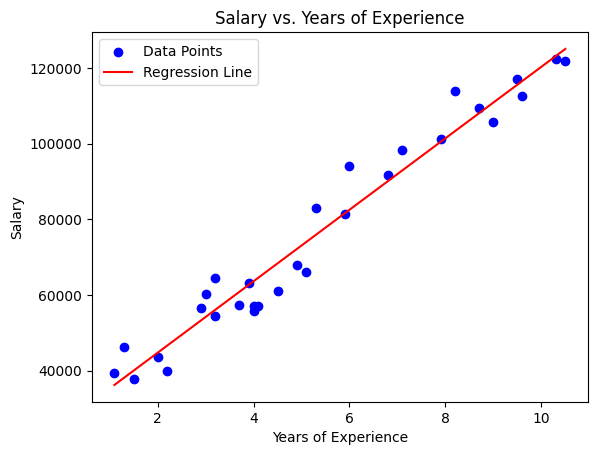

In [28]:
# Create scatter plot of actual data
plt.scatter(X, y, color = 'blue', label = 'Data Points')
# Plot the regression line
plt.plot(X, y_pred, color = 'red', label = 'Regression Line')
# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
# Add legend
plt.legend()
# Show the plot
plt.show()

**Explanation:**

plt.scatter(X, y) plots the actual data points (blue dots).

plt.plot(X, y_pred) draws the regression line (red) based on the model’s predictions.

Labels and legend make the plot interpretable.

Expect a scatter of points with some spread (due to noise) and a red line closely following the trend.

**Action:**

Run this code.

Check the plot. It should show blue dots (data points) with a red line cutting through them, indicating the linear fit.

If the line doesn’t fit well, revisit the data or model (e.g., check for outliers).

**Step 8: Interpret and Improve**

**What:** Analyze the model’s performance and consider improvements.

**Why:** To ensure the model is reliable and explore ways to enhance it.

**How:**

**Interpret Results:**

Check the R² score: If >0.8, the model captures most of the linear trend.

Check MSE: A large value is expected due to salary scale, but compare it to the salary range (e.g., ~$30,000–$120,000).

Check the plot: The regression line should follow the data trend closely.


**Improvements (if needed):**

**Outliers:** Remove extreme data points if they skew the model (e.g., df = df[df['Salary'].between(df['Salary'].quantile(0.05), df['Salary'].quantile(0.95))]).

**Feature Scaling:** Not needed for simple linear regression but useful for other models.

**Non-linear Models:** If the plot shows a non-linear trend, try polynomial regression (from sklearn.preprocessing import PolynomialFeatures).

**Cross-Validation:** Use cross_val_score to test model robustness: